In [1]:
!pwd

/kaggle/working


In [2]:
import os 
import numpy as np

# 1. Importing Dataset and Labels

In [3]:
# Importing the labels in .npy format 
print("Importing .npy labels")
file_path_npy = '/kaggle/input/ahmethan/labels1.npy'
labels_npy = np.load(file_path_npy, allow_pickle=True)
print((f"the len of labels_npy {len(labels_npy)}"))
print(f"the type of the label_npy is {type(labels_npy)}\n")

# Importing the labels in .txt format
print("Importing .txt labels")
file_path_txt = os.listdir('/kaggle/input/labels1/labels')
print(f"the len of label_txt {len(file_path_txt)}") # it needs to be sorted
labels_txt = sorted(file_path_txt)
print(f"the type of the labels_txt is {type(labels_txt)}\n")

# Importing the images in .jpg (original format)
print("Importing .jpg imges")
images_path = os.listdir('/kaggle/input/dataset-vehicle1/images') # it needs to be sorted
print(f"the len of images list {len(images_path)}") 
images_list = sorted(images_path)
print(f"the type of the labels_txt is {type(images_list)}\n")

Importing .npy labels
the len of labels_npy 8218
the type of the label_npy is <class 'numpy.ndarray'>

Importing .txt labels
the len of label_txt 8219
the type of the labels_txt is <class 'list'>

Importing .jpg imges
the len of images list 8219
the type of the labels_txt is <class 'list'>



In [4]:
# Checking the validity of images list and the corresponding labels list
print(labels_txt[500])
print(images_list[500])


Highway_117_2020-07-30_jpg.rf.46d77343ef898e15519abd22dc1c45ee.txt
Highway_117_2020-07-30_jpg.rf.46d77343ef898e15519abd22dc1c45ee.jpg


In [5]:
# Removing .txt file from images list
for i in range(len(images_list)):
      if images_list[i].endswith(".txt"):
            print(f"the index of the .txt file is {i}")



the index of the .txt file is 5694


In [6]:
# Checking the 5694 index of images_list
images_list[5694]

'train.txt'

In [7]:
# Removing the 5694 index of images_list
# Please DO NOT run this line of code more than 1 time!
images_list.remove(images_list[5694])

In [8]:
# Checking the 5694 index of images_list after removing the .txt file
images_list[5694]

'ulu0_jpg.rf.fa56a0f31c0eb2390fe1096028be63e4.jpg'

In [9]:
import cv2

# Loading images and associate labels
labeled_images = {}

for i, image_path in enumerate(images_list):
    new_dir = '/kaggle/input/dataset-vehicle1/images'+'/'+image_path
    image = cv2.imread(new_dir)
    label = labels_npy[i] 
#     elif i >= 5694:
#         image = cv2.imread(image_path)
#         label = labels[i+1]  # Get the corresponding label from the loaded labels array

    labeled_images[image_path] = {'image': image, 'label': label}

# 2. Dataset Analyzing

 the image size is (408, 408, 3)
[[3.       0.509804 0.411765 0.107843 0.245098]
 [2.       0.210784 0.616422 0.127451 0.232843]]


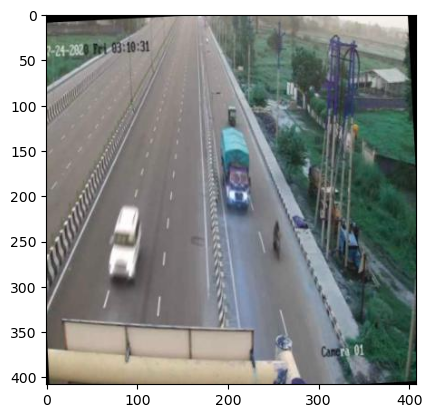

In [10]:
# Checking the image
import matplotlib.pyplot as plt
image_test = labeled_images['Highway_0_2020-07-30_jpg.rf.09e9d4467f17b2b870a5d1b94a38774a.jpg']
image = image_test['image']
label = image_test['label']
print(f" the image size is {image.shape}")
print(label)
plt.imshow(image)

In [11]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

In [12]:
import torchvision.transforms as transforms
from torchvision.transforms import v2
import pathlib
import torch
import torchvision
import pathlib
from collections import defaultdict
import PIL.Image
import torch
import torch.utils.data
import torchvision
from torchvision import models, datasets
import torchvision.transforms.v2 as transforms

/opt/conda/lib/python3.10/site-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
/opt/conda/lib/python3.10/site-packages/torchvision/transforms/v2/__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https:/

In [13]:
# Defining the bounding box
bbox_1 = label[0]
bbox_2 = label[1]
print(bbox_1,'\n')
print(bbox_2)

[3.       0.509804 0.411765 0.107843 0.245098] 

[2.       0.210784 0.616422 0.127451 0.232843]


In [14]:
def bbox_draw(bbox, shape):
    class_id, center_x_normalized, center_y_normalized, width_normalized, height_normalized = bbox
    
    center_x_pixel = int(center_x_normalized * shape[0])
    center_y_pixel = int(center_y_normalized * shape[1])
    width_pixel = int(width_normalized * shape[0])
    height_pixel = int(height_normalized * shape[1])

    # Convert center coordinates to top-left coordinates
    top_left_x = center_x_pixel - width_pixel // 2
    top_left_y = center_y_pixel - height_pixel // 2

    # Convert center coordinates to bottom-right coordinates
    bottom_right_x = center_x_pixel + width_pixel // 2
    bottom_right_y = center_y_pixel + height_pixel // 2

    bbox_pascal_voc = [top_left_x, top_left_y, bottom_right_x  ,bottom_right_y  , class_id]
    color = (255, 0, 0)  # Green color for bounding box
    img = cv2.rectangle(image, (top_left_x, top_left_y), (bottom_right_x, bottom_right_y), color, 2)

    return img, [bbox_pascal_voc]

In [15]:
first_bbox = bbox_draw(bbox_1, image.shape)
second_bbox = bbox_draw(bbox_2, image.shape)

In [16]:
first_bbox[1]

[[187, 119, 229, 217, 3.0]]

In [17]:
print(f"pixel values for first image and its class id {first_bbox[1]}")

pixel values for first image and its class id [[187, 119, 229, 217, 3.0]]


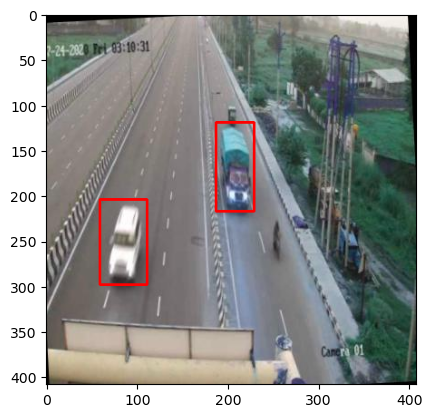

In [18]:
plt.imshow(first_bbox[0])

In [19]:
import albumentations as A

# Define the augmentation pipeline
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.5),
    A.Rotate(limit=10, p=0.5),
    A.RandomRain(slant_lower=-10, slant_upper=10, drop_length=20, drop_width=1, drop_color=(200, 200, 200), blur_value=5, brightness_coefficient=0.7, p=0.5),
    A.RandomFog(fog_coef_lower=0.3, fog_coef_upper=0.7, alpha_coef=0.08, p=0.5),
    A.RandomSunFlare(flare_roi=(0, 0, 1, 0.5), angle_lower=0.5, angle_upper=1, p=0.5),
    A.RandomShadow(shadow_roi=(0, 0.5, 1, 1), num_shadows_lower=1, num_shadows_upper=2, shadow_dimension=5, p=0.5),
    A.RandomSnow(snow_point_lower=0.1, snow_point_upper=0.3, brightness_coeff=2.5, p=0.5),
    A.CLAHE(p=0.5),
    A.GridDistortion(p=0.5),
    A.HueSaturationValue(hue_shift_limit=10, sat_shift_limit=20, val_shift_limit=10, p=0.5),

], bbox_params=A.BboxParams(format='pascal_voc'))


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [20]:
len(first_bbox[1])

1

In [21]:
augmented = transform(image= first_bbox[0], bboxes= first_bbox[1])
augmented_image = augmented['image']
augmented_bboxes = augmented['bboxes']

In [22]:
import cv2
import matplotlib.pyplot as plt

def display_image_with_bboxes(img, bboxes, labels=None):
    
    for idx, bbox in enumerate(bboxes):
        x_min, y_min, x_max, y_max = map(int, bbox[:-1])
        
        color = (0, 255, 0)  # Green color for bounding boxes
        cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color, 2)

    plt.imshow(img)
    plt.axis('off')
    plt.show()

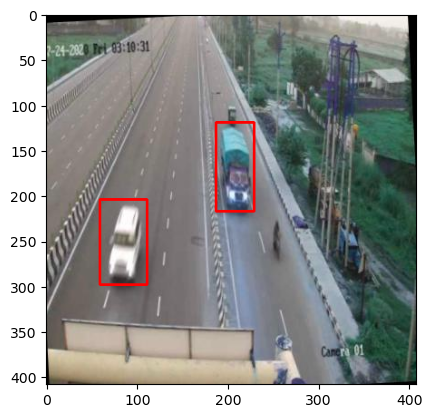

In [23]:
# Original image
plt.imshow(first_bbox[0])

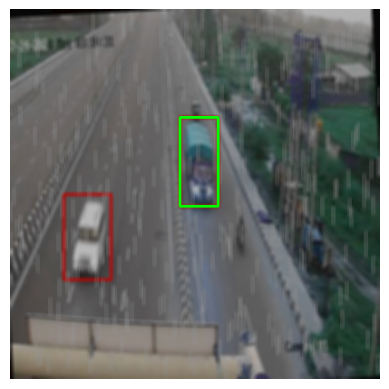

In [24]:
# Augmented image
aug_image = display_image_with_bboxes(augmented_image, augmented_bboxes)

In [25]:
labels_npy[0][0][0]

3.0

In [26]:
# Figuring out the number of each class in the given dataset
auto = 0
bus = 0
car = 0
lcv = 0
motorcycle = 0
multiaxle = 0
tractor = 0
truck = 0

for idx, label in enumerate(labels_npy):
    for j in range(len(labels_npy[idx])):
        if labels_npy[idx][j][0] == 0:
            auto += 1 
        if labels_npy[idx][j][0] == 1:
            bus += 1 
        if labels_npy[idx][j][0] == 2:
            car += 1
        if labels_npy[idx][j][0] == 3:
             lcv+= 1
        if labels_npy[idx][j][0] == 4:
            motorcycle += 1
        if labels_npy[idx][j][0] == 5:
            multiaxle += 1
        if labels_npy[idx][j][0] == 6:
            tractor += 1 
        if labels_npy[idx][j][0] == 7:
            truck += 1
            
        

In [27]:
print(auto)
print(bus)
print(car)
print(lcv)
print(motorcycle)
print(multiaxle)
print(tractor)
print(truck)


819
1319
11425
969
7285
1147
171
2963


In [28]:
total = (auto)+(bus)+(car)+(lcv)+(motorcycle)+(multiaxle)+(tractor)+(truck)

print(f"the total amount of vehicle classes {total}")

the total amount of vehicle classes 26098


In [29]:
vehicle_classes = ['auto', 'bus', 'car', 'lcv', 'motorcycle', 'multiaxle', 'tractor', 'truck']
vehicles_qunatity = [819, 1319, 11425, 969, 7285, 1147, 171, 2963]
colors = ['#ff9999','#66b2ff','#99ff99','#ffcc99', '#c2c2f0','#ffb3e6', '#ff6644']

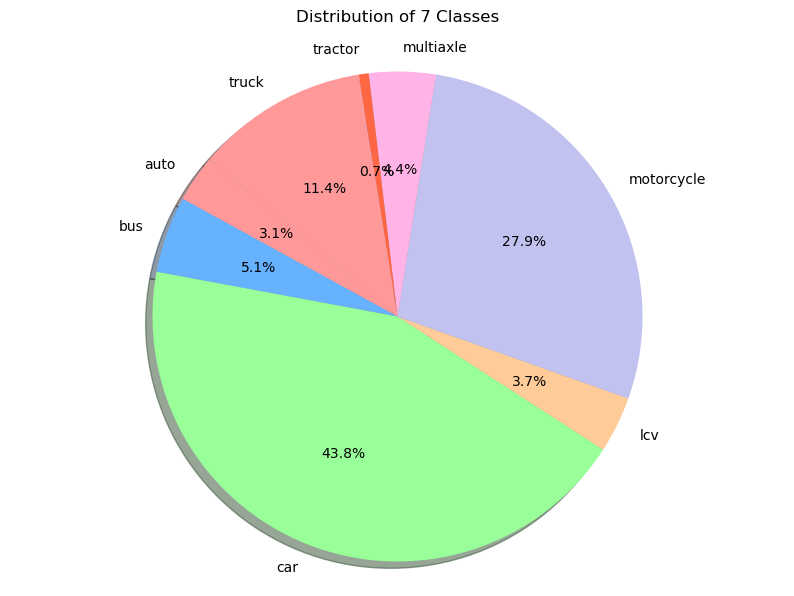

In [30]:
plt.figure(figsize=(10,7))
plt.pie(vehicles_qunatity, labels= vehicle_classes, colors= colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of 7 Classes\n')
plt.show()

# 3. Training The Model

In [31]:
import cv2
import numpy as np
import torch
from torchvision import transforms
from torch.utils.data import Dataset
import albumentations as A
from torch.utils.data import Dataset

In [32]:
# Defining Albumentations's transform
albu_transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.5),
    A.Rotate(limit=10, p=0.5),
    A.RandomRain(slant_lower=-10, slant_upper=10, drop_length=20, drop_width=1, drop_color=(200, 200, 200), blur_value=5, brightness_coefficient=0.7, p=0.5),
    A.RandomFog(fog_coef_lower=0.3, fog_coef_upper=0.7, alpha_coef=0.08, p=0.5),
    A.RandomSunFlare(flare_roi=(0, 0, 1, 0.5), angle_lower=0.5, angle_upper=1, p=0.5),
    A.RandomShadow(shadow_roi=(0, 0.5, 1, 1), num_shadows_lower=1, num_shadows_upper=2, shadow_dimension=5, p=0.5),
    A.RandomSnow(snow_point_lower=0.1, snow_point_upper=0.3, brightness_coeff=2.5, p=0.5),
    A.CLAHE(p=0.5),
    A.GridDistortion(p=0.5),
    A.HueSaturationValue(hue_shift_limit=10, sat_shift_limit=20, val_shift_limit=10, p=0.5),

], bbox_params=A.BboxParams(format='pascal_voc'))


In [33]:
# Defining PyTorch's transform
torch_transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [34]:
print(f"len of images {len(images_list)} and len of labels {len(labels_npy)}")

len of images 8218 and len of labels 8218


In [35]:
dataset = list(zip(images_list, labels_npy))

In [36]:
class CustomDataset(Dataset):
    def __init__(self, image_paths, labels, albu_transform=None, torch_transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.albu_transform = albu_transform
        self.torch_transform = torch_transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        label = self.labels[idx]

        # Load image using OpenCV
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # Convert from BGR to RGB

        if self.albu_transform:
            augmented = self.albu_transform(image=image)
            image = augmented['image']

        # Convert the image to PIL format for PyTorch's transform
        image = transforms.ToPILImage()(image)

        if self.torch_transform:
            image = self.torch_transform(image)

        return image, label


In [37]:
custom_dataset = CustomDataset(images_list, labels_npy, albu_transform=albu_transform, torch_transform=torch_transform)